In [1]:
! pip install cv2 

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


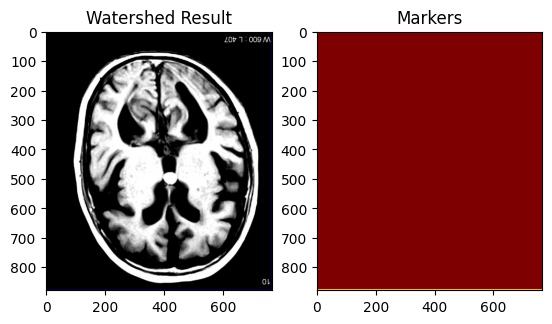

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('C:/Users/desai/OneDrive/Desktop/M.Tech Projects/Dataset/yes/y10.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to convert the image to binary
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations (opening)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area (dilation)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Distance transform to get sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region (subtract sure foreground from background)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the background is not zero, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 0] = 0

# Apply Watershed
markers = cv2.watershed(image, markers)

# Mark boundaries (where markers are -1) in red
image[markers == -1] = [255, 0, 0]

# Plot the watershed result
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Corrected BGR to RGB for visualization
plt.title('Watershed Result')

# Prepare markers for visualization
# Set the boundaries (-1) to max value (for better visualization)
vis_markers = np.copy(markers)
vis_markers[vis_markers == -1] = 0  # Set boundaries to 0 for better color distinction
vis_markers = vis_markers.astype(np.uint8)

# Normalize the markers for proper visualization (scale to 0-255)
norm_markers = cv2.normalize(vis_markers, None, 0, 255, cv2.NORM_MINMAX)

# Plot the markers with a colormap
plt.subplot(1, 2, 2)
plt.imshow(norm_markers, cmap='jet')  # Use 'jet' for better color distinction
plt.title('Markers')

plt.show()
